<a href="https://colab.research.google.com/github/jahnavisrikoti/DataDiction/blob/main/250472_Jahnavi_Srikoti_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df = pd.read_csv('addiction_data.csv')
print('SHAPE:', df.shape)
print('\n COLUMNS:')
print(df.columns.tolist())
print('\n FIRST 5 ROWS:')
print(df.head())
print('\n TYPES:')
print(df.dtypes)
print('\n NULLS:')
print(df.isnull().sum())

SHAPE: (4285, 30)

 COLUMNS:
['Age', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Gender_Male', 'Gender_Other', 'Phone_Usage_Purpose_Education', 'Phone_Usage_Purpose_Gaming', 'Phone_Usage_Purpose_Other', 'Phone_Usage_Purpose_Social Media', 'Total_Screen_Time', 'Usage_Intensity', 'Stress_Index', 'Weekend_Spike', 'Addiction_Class']

 FIRST 5 ROWS:
        Age  School_Grade  Daily_Usage_Hours  Sleep_Hours  \
0  0.041980      0.849960          -1.462212    -0.271791   
1  1.541029      0.849960          -0.263525     0.440795   
2  0.041980     -0.882164          -0.751879    -0.012669   
3 -0.457703     -0.304789          -0.263525     0.959040   
4 -1.457069     -0.3047

In [12]:
# Drop rows with missing target, if any
df = df.dropna(subset=["Addiction_Class"])

# Optionally fill any remaining NaNs in features with column median
feature_cols = [c for c in df.columns if c != "Addiction_Class"]
df[feature_cols] = df[feature_cols].fillna(df[feature_cols].median())

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[feature_cols].values
y = df["Addiction_Class"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

num_features = X_train_scaled.shape[1]
num_classes = len(np.unique(y))

model = Sequential([
    Dense(64, activation="relu", input_shape=(num_features,)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2576 - loss: 1.9429 - val_accuracy: 0.5845 - val_loss: 1.1913
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5399 - loss: 1.2987 - val_accuracy: 0.6137 - val_loss: 0.9390
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5812 - loss: 1.0981 - val_accuracy: 0.6793 - val_loss: 0.7918
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.9317 - val_accuracy: 0.7318 - val_loss: 0.6930
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6474 - loss: 0.8863 - val_accuracy: 0.7682 - val_loss: 0.6250
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6806 - loss: 0.7963 - val_accuracy: 0.8134 - val_loss: 0.5534
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.7428 - val_accuracy: 0.8528 - val_loss: 0.5020
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.6769 - val_accuracy: 0.8528 - val_loss: 0.4

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      0.99      0.99        80
           2       0.96      0.97      0.97        80
           3       0.93      0.96      0.94        80
           4       0.93      0.93      0.93        80
           5       0.91      0.76      0.83        80
           6       0.96      0.99      0.98       377

    accuracy                           0.96       857
   macro avg       0.96      0.94      0.95       857
weighted avg       0.96      0.96      0.96       857



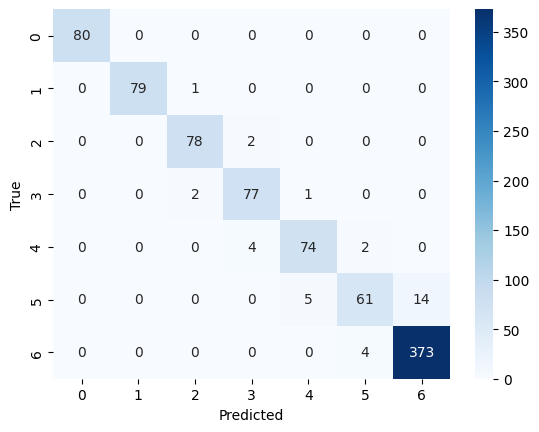

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Use your existing X_train, y_train
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)

                             feature  importance
2                  Daily_Usage_Hours    0.140456
26                   Usage_Intensity    0.133063
25                 Total_Screen_Time    0.073826
13                   Apps_Used_Daily    0.071105
28                     Weekend_Spike    0.067729
14              Time_on_Social_Media    0.053203
3                        Sleep_Hours    0.050672
15                    Time_on_Gaming    0.043217
12              Phone_Checks_Per_Day    0.042418
18               Weekend_Usage_Hours    0.030940
4               Academic_Performance    0.028404
16                 Time_on_Education    0.027105
11            Screen_Time_Before_Bed    0.024564
6                     Exercise_Hours    0.023740
27                      Stress_Index    0.022215
5                Social_Interactions    0.021595
17              Family_Communication    0.020180
9                        Self_Esteem    0.019231
8                   Depression_Level    0.019152
7                   